# Machine Learning Assignment # 2 : Housing Prices

by Elisabeth Marie Hovden

Group members:
-  Elisabeth Marie Hovden
-  Henrik Helland Olsgaard

## 1. Frame the problem and look at the big picture

This is an assignment based on "Housing Prices Competition for Kaggle Learn Users" found on : https://www.kaggle.com/c/home-data-for-ml-course.
The dataset this assignment is based on contains 79 explanatory variables describing close to every aspect of residential homes in Ames, Iowa. Using these, we want to predict the final price of each home.

This is a typical regression problem, as we have to predict a real value. It is also labeled, which means that it is something called supervised learning. The training data we feed to the algorithm includes the desired solution, the labels.

## Setup

The first thing we want to do is to set up the environment by importing the libraries needed for this assignment.

In [1]:
# To display plots directly in the notebook
%matplotlib inline

In [2]:
from xgboost import XGBRegressor as xgbr
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib
import sklearn
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


# This is for ignoring useless warnings
import warnings
warnings.filterwarnings('ignore')

# To make sure all data is displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 900)

In [3]:
# To make the notebook reproducible, we set the random seed
seed = 42
np.random.seed(seed)

_______

## 2. Get the data

In this part, we are going to fetch all the housing-data that we have available. This includes both the training set and the test set.

First of all, we define two methods: one for fetching the training set and one for the test set.

In [4]:
# The training set
def load_housing_data():
    housing_file_path = 'datasets/train.csv'   
    return pd.read_csv(housing_file_path)

In [5]:
housing_data = load_housing_data()

Then, we load the first five entries from the training set to check both formatting and labeling. 

In [6]:
housing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print("\nThe housing data size is: {} ".format(housing_data.shape)) 


The housing data size is: (1460, 81) 


_____________________________

## 3. Explore the data to gain insights

The info()-method prints out information about a dataframe. It is a summary including the index dtype and column dtypes, non-null values and memory usage.

In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

As you can see, the number of entries is 1460, while many of the attributes have numbers way lower than this. This means that these columns have missing values. An example of this is 'PoolQC' with only 7 values in it - leaving as much as 1453 of the entries with a missing value for this attribute.

Also, we should mention that the values that are object data types have different attributes they can be set to. To fetch the different values with the corresponding count for each one, we can use the .value_counts() method.

For example, the SaleCondition can be either 'Normal', 'Partial', 'Abnorml', 'Family', 'Alloca' or 'AdjLand'.

In [9]:
housing_data["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

The .describe()-method can be used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [10]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Here, we can see that 
-  The houses are built between 1872 and 2010. 
-  The sale price ranged from 34,900 to 755,000.
-  The overall material and finish quality can range from 1 to 10.
-  The house with the earliest sales date was sold in 2006.
-  If we look at houses sold for the price of 163,000, it covers 50% of all housings in the data we have.

This gives us a good indication of what kind of data we are dealing with, but to get an even better overview, we can use the .hist() method which make a histogram of the DataFrame's. 

The number of bins defines the number of histogram bins to be used. The higher we set this number, the more information we will get out of the histograms, but the harder it will be to read the different values and differentiate between them. It will only show datafields of the int64 and float64 datatypes, though, as it cannot convert the objects to numerical values.

As I only want to get a rough overview, I have set the number of bins to 15.

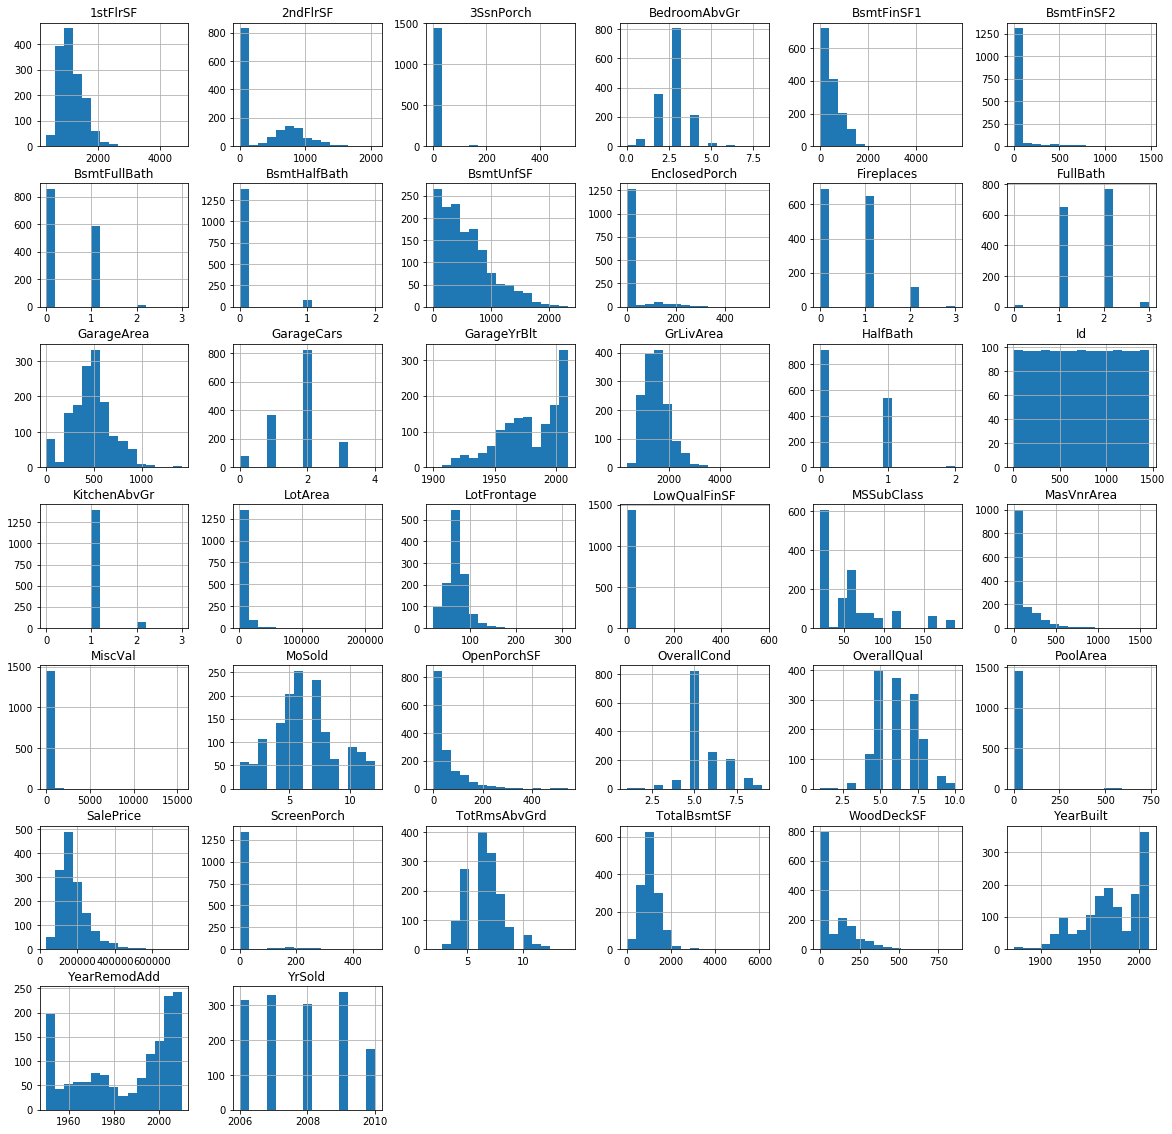

In [11]:
housing_data.hist(bins=15, figsize=(20,20))
plt.show()

The histograms will give us a more visual overview of the data that we are working with. It is easier to see which range the majority of the values are within, and where the different spikes are.

We can see that we have the correct number of histograms here by looking at the output from the housing_data.info() method. At the bottom, it says: 
-  dtypes: float64(3), int64(35), object(43)

And we have exactly 38 different histograms here.

If we want to look closer at one of the histograms, we can do it this way:

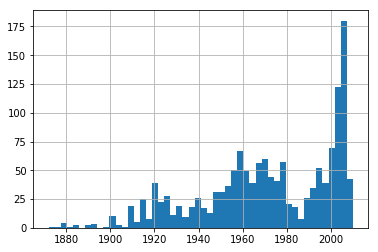

In [12]:
housing_data["YearBuilt"].hist(bins=50)

#### Correlations

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to -1, it means that there is a strong negative correlation. Finally, coefficients close to zero mean that there is no linear correlation.

To compute the pairwise correlation of columns, we can use the .corr() method. Then we can choose which datafield we want to do the comparison with.

In [13]:
corr_matrix=housing_data.corr()

One of the most interesting datafields to check out is the SalePrice, which represents the property's sale price in dollars. This is also the target variable we are trying to predict.

In [14]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Not surprisingly, there is a significant positive correlation between the OverallQual (the overall material and finish quality) and the sale price. Other things worth mentioning:
-  There is a small negative correlation with 'YrSold' - the year the house was sold. This means that, on average, the houses have gotten a bit more expensive compared to earlier, but not as much as I would have thought.
-  The year the house was built also has a positive correlation with the sale price. The newer the house is, the more expensive the house will be (most likely).

#### A closer look at the correlation between the data fields (with the highest correlation to the sale price)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E170DF42E8>,
      dtype=object)

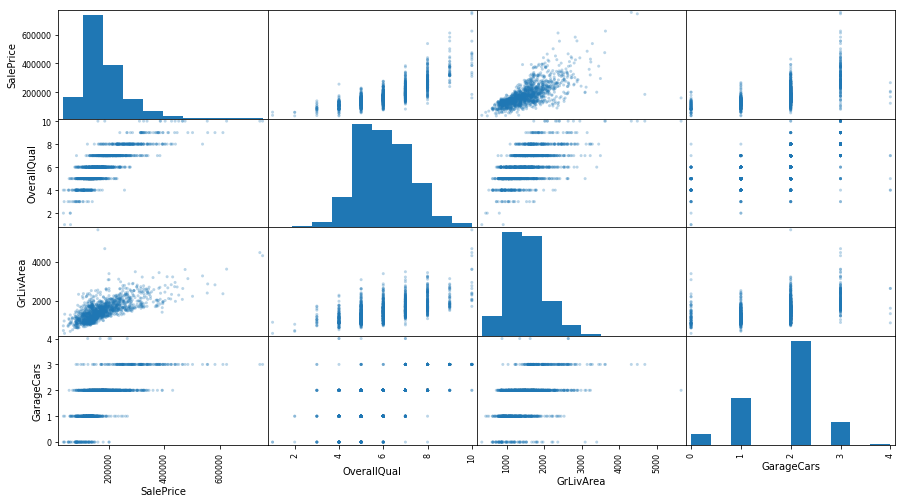

In [15]:
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]

scatter_matrix(housing_data[attributes], figsize=(15, 8), alpha=0.3)

-  The GarageCars attribute shows the size of the garage in car capacity. All the houses that had room for zero cars, also had a sale price below 200,000. The most expensive houses had enough space for three cars.
-  The overall quality increases with the sale price.
-  The above grade (ground) living area in square feet (GrLivArea) is in most cases below 2000 for houses under the sale price of 300,000

#### The overall correlation of house prices

To get an even better overview, we can use the .heatmap() function. Explanation of parameters:

-  linewidths : float, optional - Width of the lines that will divide each cell.
-  cmap : matplotlib colormap name or object, or list of colors, optional - The mapping from data values to color space. If not provided, the default will depend on whether center is set.
-  annot : bool or rectangular dataset, optional - If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data.

Source: https://seaborn.pydata.org/generated/seaborn.heatmap.html

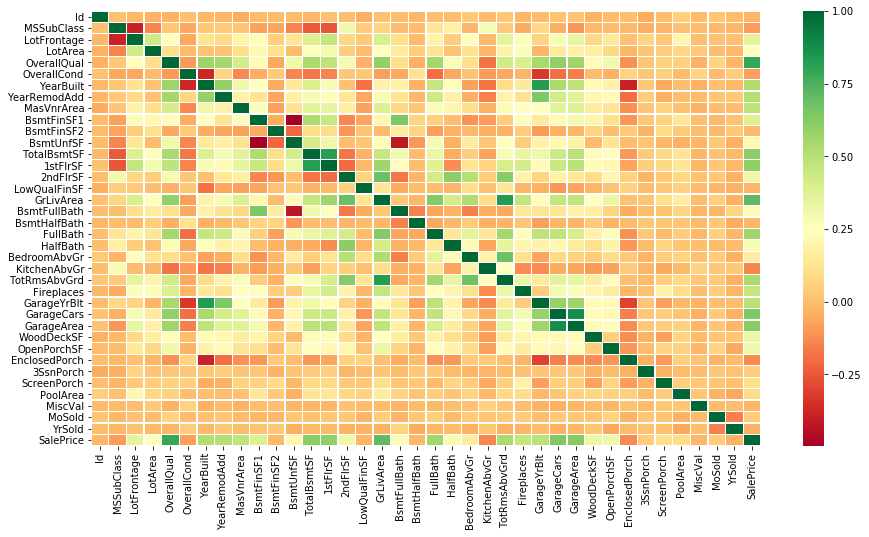

In [16]:
# Checking feature correlations
corr = housing_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=False, cmap='RdYlGn', linewidths=0.3)
plt.show()

____________________________

## 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

To prepare the data, we need to
-  Do something with the missing values
-  Transform the categorical features into integer arrays

Most Machine Learning algorithms cannot work with missing features. As you may have noticed, many of the different attributes have some missing values. Now you have three options:

-  Get rid of the whole attribute
-  Set the values to some value (zero, the mean, the median, etc.)

First of all, we make a copy of the housing set, just in case we do any damage to it.

In [17]:
housing_data_edited = housing_data.copy()

Then, we can remove the 'id' column since it will not affect the predictions.

In [18]:
#Save the 'Id' column
housing_ID = housing_data_edited['Id']

housing_data_edited.drop('Id', axis = 1, inplace = True)

To check if we successfully removed the 'id' column:

In [19]:
housing_data_edited[housing_data_edited.isnull().any(axis=1)].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We now want to see which categories are missing data.

##### Top 20 categories with missing data:

In [20]:
print(housing_data_edited.isnull().sum().sort_values(ascending=False).head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64


The PoolQC is missing in most of the cases (we have a total of 1460 entries), so we are just going to drop this variable. As 'MiscFeature' and 'Alley' are also missing the majority of its data, we will do the same for them.

In [21]:
housing_data_edited.drop("PoolQC", axis=1, inplace=True)
housing_data_edited.drop("MiscFeature", axis=1, inplace=True)
housing_data_edited.drop("Alley", axis=1, inplace=True)

To check if we successfully removed the columns, we can check the number of columns in the set. As the set had 81 columns before we edited it and we removed three of the values + the 'id' attribute which we removed earlier, it should have 77 now.

In [22]:
len(housing_data_edited.columns)

77

As for the missing values, we want to fill them with values based on the type of value they represent.

#### Handling the missing values

In [23]:
# All columns where missing values can be replaced with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    housing_data_edited[col] = housing_data_edited[col].fillna(0) 
    
    # All columns where missing values can be replaced with 'None'
for col in ('Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    housing_data_edited[col] = housing_data_edited[col].fillna('None')
    
    # All columns where missing values can be replaced with the mode (most frequently occurring value)
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    housing_data_edited[col] = housing_data_edited[col].fillna(housing_data_edited[col].mode()[0])
    
housing_data_edited['LotFrontage'] = housing_data_edited['LotFrontage'].fillna(housing_data_edited['LotFrontage'].median())
    

We can now check that the null-values are gone:

In [24]:
print(housing_data_edited.isnull().sum().sort_values(ascending=False).head(10))

SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
BsmtQual       0
dtype: int64


Perfect!

In [25]:
housing_data_edited_cat = housing_data_edited.select_dtypes(include=['object']).copy()

In [26]:
housing_data_edited.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,MnPrv,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,None,0,1,2008,WD,Normal,118000


In [27]:
housing_data_edited.shape

(1460, 77)

______

#### Splitting the training data and the test data

The next thing we want to do is to split the training data and the test data. This is done by determining how big we want the test data to be, based on the test size. 

Then we save the indices for the data in two variables: train_set and test_set. The training data will be taken from the first part of the data set and the test data will be taken from the last part.

In [28]:
y = housing_data_edited.SalePrice

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set, targetPriceTrain, targetPriceTest = train_test_split(housing_data_edited, y, test_size=0.2)

We decide that we want the test_ratio to be 0.2, which means that the test data will be 20 % of the whole data set.
Then we print the length of each data set.

In [30]:
print(len(train_set), "train +", len(test_set), "test")

1168 train + 292 test


________

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [32]:
# List of columns to Encode
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageType', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'SaleCondition', 'Street', 'MSZoning', 'LandContour', 
        'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'SaleType')

enc = OrdinalEncoder()

Disclaimer: I do not know why, but I couldn't manage to transform the test set. I tried to transform the whole set before splitting it, and I also tried to transform the test set by itself, but I get some errors:
- 'OrdinalEncoder' object has no attribute 'categories_'
-  Found unknown categories ['FA', 'TA', 'Gd', 'Po', 'Ex', 'None'] in column 0 during transform

In [33]:
# Process columns, apply OrdinalEncoder to categorical features
for c in cols:
    enc.fit(train_set[[c]].values.reshape(-1,1)) 
    train_set[[c]] = enc.transform(train_set[[c]].values.reshape(-1,1))
   
    #test_set.values.reshape(-1,1)
    #test_set[[c]] = enc.transform(test_set[[c]].values.reshape(-1,1))

##### To see if we managed to encode the columns successfully:

In [34]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 77 columns):
MSSubClass       1168 non-null float64
MSZoning         1168 non-null float64
LotFrontage      1168 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null float64
LotShape         1168 non-null float64
LandContour      1168 non-null float64
Utilities        1168 non-null float64
LotConfig        1168 non-null float64
LandSlope        1168 non-null float64
Neighborhood     1168 non-null float64
Condition1       1168 non-null float64
Condition2       1168 non-null float64
BldgType         1168 non-null float64
HouseStyle       1168 non-null float64
OverallQual      1168 non-null int64
OverallCond      1168 non-null float64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null float64
RoofMatl         1168 non-null float64
Exterior1st      1168 non-null float64
Exterior2nd      1168 non-null float64
Ma

As you can see, all the values are now encoded, and we no longer have any columns defined as 'object'.

##### SalePrice

The sale price is what we want to predict in the training set, so we drop the columns here, as we already saved them earlier while splitting the dataset.

In [35]:
train_set_wo_price = train_set.drop('SalePrice', axis=1)
test_set_wo_price = test_set.drop('SalePrice', axis=1)

To check if successfully managed to extract this data into its own variable:

In [36]:
targetPriceTrain.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

## 5. Explore many different models and short-list the best ones

Below are some of the different models listed and explained as in the book "Hands-On Machine Learning with Scikit-Learn & TensorFlow" by A. Géron.

##### Random Forest
Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest".

Source: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

##### Linear Regression
Linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

##### Gradient Descent
Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

##### Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression that forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. 

##### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function.

##### Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

##### XGboost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

Source: https://xgboost.readthedocs.io/en/latest/

We are not going to try out all of them here, as this is just a short-list, but I will show you how the Linear Regression and Random Forest works as they are quite simple.

________

###### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_wo_price, targetPriceTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

.coef_ gives the coefficients and .intercept_ gives the estimated intercepts.

In [38]:
print("Number of coefficients: \n", len(lin_reg.coef_))

Number of coefficients: 
 76


In [39]:
print("Estimated intercept coefficient: \n", lin_reg.intercept_)

Estimated intercept coefficient: 
 -434851.0133633148


If we look at the first four values in both the predicted set and the set with the actual price, we can see that they are quite off.

In [40]:
lin_reg.predict(train_set_wo_price)[0:4]

array([129104.37024326, 183750.38758444, 105192.8889582 , 184105.69205393])

In [41]:
targetPriceTrain[0:4]

254     145000
1066    178000
638      85000
799     175000
Name: SalePrice, dtype: int64

It is easier to see graphically, so we make a scatterplot with the predicted price on the y-axis and the actual price on the x-axis.

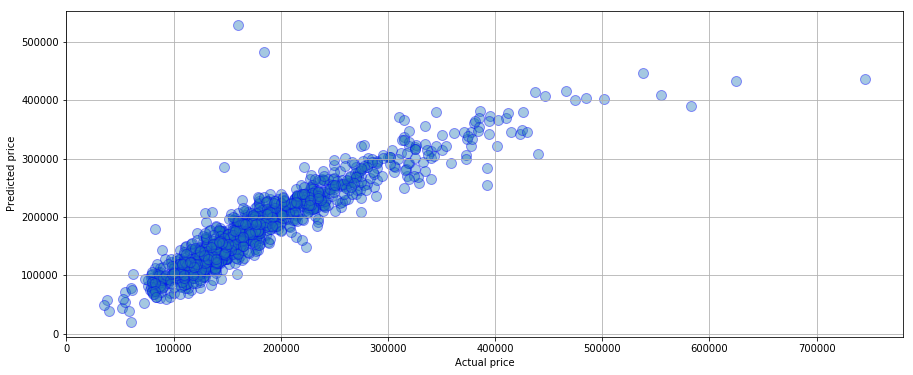

In [42]:
plt.figure(figsize=(15, 6))
plt.ylabel("Predicted price")
plt.xlabel("Actual price")
plt.grid(True)
plt.scatter(targetPriceTrain, lin_reg.predict(train_set_wo_price), edgecolors='blue', alpha=0.4, s=100)
plt.show()

Here we can see that some of the values are way off, and it seems that the higher the price is, the more off the predictions are.

###### The mean squared error:

In [43]:
mse = (np.square(targetPriceTrain - lin_reg.predict(train_set_wo_price)).mean())
print(mse)

923186585.2851981


___________

###### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1500 decision trees
rf = RandomForestRegressor(n_estimators = 1500, random_state = 42)

In [45]:
# Train the model on training data
rf.fit(train_set_wo_price, targetPriceTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf='deprecated', min_samples_split=2,
           min_weight_fraction_leaf='deprecated', n_estimators=1500,
           n_jobs=None, oob_score=False, random_state=42, verbose=0,
           warm_start=False)

In [46]:
# Use the forest's predict method on the training data
predictions = rf.predict(train_set_wo_price)

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(targetPriceTrain, predictions)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', error)

Mean Absolute Error: 6421.112212328768


In [47]:
predictions[0:4]

array([145524.38066667, 176035.89666667,  91061.66066667, 165467.332     ])

In [48]:
targetPriceTrain[0:4]

254     145000
1066    178000
638      85000
799     175000
Name: SalePrice, dtype: int64

As you can see, the predictions using Random Forest are a bit closer to the actual price.

In general, Random Forest has a higher accuracy but lower interpretability than the Linear Regression, but the Linear Regression has lower accuracy. Also, the Random Forest is a tree-based model.

###### XGBoost
As this is one of the most powerful boosting algorithms out there now, this is the one that I will be using and fine-tuning.

## 6. Fine-tune your models and combine them into a great solution

In [49]:
xgb_reg = xgbr(n_jobs=-1)
xgb_reg.fit(train_set_wo_price, targetPriceTrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [50]:
pred = xgb_reg.predict(train_set_wo_price)

In [51]:
mean_absolute_error(targetPriceTrain, pred)

10440.181065389555

In [52]:
pred[0:10]

array([143273.48, 177795.84,  97408.28, 144004.77, 130556.44, 141143.89,
       181329.23, 115250.55, 178016.77, 235541.39], dtype=float32)

In [64]:
np.array(targetPriceTrain[0:10])

array([145000, 178000,  85000, 175000, 127000, 149900, 174000, 125500,
       175500, 225000], dtype=int64)

As you can see, this is quite promising - but we obviously need to do some tuning of XGBoost's hyperparameters.

#### Tuning XGBoost

In [54]:
xgb_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.0, 1.0, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8, 10]
        }


xgb_param_grid_large = {
        'learning_rate': [0.1, 0.05, 0.2],
        'n_estimators': [50, 100, 500, 600],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.0, 1.0, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.5, 0.6, 0.8],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        }

In [55]:
xgb_reg = xgbr(random_state=42)

In [56]:
r_xgb_reg = RandomizedSearchCV(xgb_reg, xgb_param_grid, n_iter=50, verbose=1, n_jobs=-1, cv=3, random_state=42)

In [57]:
%%time
r_xgb_reg.fit(train_set_wo_price, targetPriceTrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   34.7s finished


Wall time: 35.4 s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.0, 1.0, 1.5], 'subsample': [0.6, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [5, 6, 7, 8, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [58]:
r_xgb_reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1.0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

I would predict it using the test set, but as mentioned earlier - it was not possible to transform it to numerical features. Therefore, it did not work on this set. It is not possible to call this method on the test set as it is: "DataFrame.dtypes for data must be int, float or bool."

In [59]:
x_pred = r_xgb_reg.predict(train_set_wo_price)

##### New mean absolute error:

In [60]:
mean_absolute_error(targetPriceTrain, x_pred)

7897.625431426584

As you can see, this is quite an improvement compared to the earlier result we got: 10756.358187740796

If we do the same for the large grid, instead of the smaller one, this is what we will get:

In [66]:
xgb_reg2 = xgbr(random_state=42)
r_xgb_reg2 = RandomizedSearchCV(xgb_reg2, xgb_param_grid_large, n_iter=50, verbose=1, n_jobs=-1, cv=3, random_state=42)

In [67]:
%%time
r_xgb_reg2.fit(train_set_wo_price, targetPriceTrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


Wall time: 1min 17s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'learning_rate': [0.1, 0.05, 0.2], 'n_estimators': [50, 100, 500, 600], 'min_child_weight': [1, 5, 10], 'gamma': [0.0, 1.0, 1.5], 'subsample': [0.6, 1.0], 'colsample_bytree': [0.5, 0.6, 0.8], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [68]:
r_xgb_reg2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1.5, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=None,
       n_estimators=500, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [69]:
x_pred2 = r_xgb_reg2.predict(train_set_wo_price)

In [70]:
mean_absolute_error(targetPriceTrain, x_pred2)

9524.66099234803

##### Cross-validation

The cross-validation feature randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 

The result is an array containing the 10 evaluation scores.

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean)
    print("Standard deviation:", scores.std())

In [62]:
xgb_scores = cross_val_score(xgb_reg, train_set_wo_price, targetPriceTrain, scoring="neg_mean_squared_error", cv=10)
xgb_reg_scores = np.sqrt(-xgb_scores)
display_scores(xgb_reg_scores)

Scores: [17510.25180246 44898.47252597 19731.94898743 42135.10661357
 33033.54238619 33157.29003013 24985.0756821  21683.68728917
 24572.2192568  24846.26842827]
Mean: <built-in method mean of numpy.ndarray object at 0x000001E1714038A0>
Standard deviation: 8843.501870972426


We can also compute a 95% confidence interval for the XGBRegressor:

In [63]:
from scipy import stats
confidence = 0.95
squared_errors = (x_pred - targetPriceTrain) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                        loc=np.mean(squared_errors),
                        scale=stats.sem(squared_errors)))

array([ 9487.27169947, 17590.73546402])

## 7. Present your solution

In this Jupyter Notebook, I have made a solution (model) that should be able to predict the sale price of a house using the data it has on it, such as the year it was built, the number of bedrooms it has, the overall condition rating etc.
The model definitely needs some improving, but at least it is better than the baseline.

As mentioned earlier in the notebook, I was not able to encode the test set during the whole process because of some error that I did not manage to figure out how to get rid of. Therefore, the results should be viewed with a grain of salt.

The most important part is that the new model got a better result than the baseline - compared using the mean squared error.

## 8. Launch, monitor and maintain your system

This part is not relevant for our assignment.